# **18-The Matrix Exponential**

---

### **Introduction**

In this notebook we study general $n \times n$ systems by introducing the matrix exponential.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**April 10, 2025**

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

In this notebook we study general $n \times n$ constant coefficient systems. To be specific, we want to consider equations of the form $\boldsymbol{X}' = \boldsymbol{A} \boldsymbol{X}$, where $\boldsymbol{A}$ is a constant $n \times n$ matrix and $\boldsymbol{X}: I \to \mathbb{R}^n$ is a vector-valued function. Previously we studied the case when $n = 2$, in this notebook we discuss the theory for general $\mathbb{N} \ni n > 2$. 

First, we will go over the genearl definition of matrix-vector multiplication and matrix-matrix multiplication. 

### Matrix-vector and matrix-matrix multiplication

> **Definition (Matrix-vector multiplication):**  
> Let $A$ be an $m \times n$ matrix of the form  
> $$  
> A = \begin{pmatrix} 
> a_{11} & a_{12} & \ldots & a_{1n} \\ 
> a_{21} & a_{22} & \ldots & a_{2n} \\ 
> \vdots & \vdots & \ddots & \vdots \\ 
> a_{m1} & a_{m2} & \ldots & a_{mn} 
> \end{pmatrix},  
> $$  
> and let $\boldsymbol{x}$ be an $n \times 1$ vector of the form  
> $$  
> \boldsymbol{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}.  
> $$  
> Then $A\boldsymbol{x}$ is defined to be an $m \times 1$ vector such that its entry in the $i$-th row is given by  
> $$  
> (A\boldsymbol{x})_i = a_{i1}\,x_1 + a_{i2}\,x_2 + \ldots + a_{in}\,x_n.  
> $$  

To visualize this, focus on the $i$-th row:
$$
\begin{pmatrix} 
\vdots & \vdots & \vdots & \vdots \\
a_{i1} & a_{i2} & \ldots & a_{in} \\
\vdots & \vdots & \vdots & \vdots 
\end{pmatrix} 
\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix} 
=
\begin{pmatrix} 
\vdots \\
a_{i1}\,x_1 + a_{i2}\,x_2 + \ldots + a_{in}\,x_n \\
\vdots 
\end{pmatrix}.
$$

**Remark:**  Note that we need  
$$
\text{the number of columns in } A = \text{the number of rows in } \boldsymbol{x},
$$  
otherwise this definition breaks down. In our original notation, each row has as many coefficients as there are variables. If these two numbers don't match up, we simply say that the matrix-vector product $A\boldsymbol{x}$ is undefined or that the components are incompatible.

An alternative way to think about this is in terms of the "column picture."

> **Proposition** 
> Let $A \in \mathcal{M}_{m \times n}(\mathbb{R})$ and let $\boldsymbol{v} \in \mathbb{R}^n$. Suppose $(\boldsymbol{v})_i = v_i$, and think of the $i$-th column of $A$ as a vector in $\mathbb{R}^n$ denoted by $\boldsymbol{a}_i$ for all $1 \le i \le n$. Then  
> \begin{align}  
> \mathbb{R}^m \ni A \boldsymbol{v} = v_1 \boldsymbol{a}_1 + \ldots + v_n \boldsymbol{a}_n.  
> \end{align}  


In other words, the entries of the vector $\boldsymbol{v}$ specify how to combine the columns of the matrix $A$ to form the matrix-vector product $A \boldsymbol{v}$.  

To visualize this, write  

$$\begin{pmatrix} \boldsymbol{a_1} & \mid & \boldsymbol{a_2} & \mid & \ldots & \mid & \boldsymbol{a_n} \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{pmatrix} = v_1 \boldsymbol{a_1} + \ldots + v_n \boldsymbol{a_n}.$$



> **Definition:** Let $A \in \mathcal{M}_{m \times n}(\mathbb{R}), B \in \mathcal{M}_{n \times p}(\mathbb{R})$. The *matrix-matrix product* (or simply the matrix product) between $A,B$, denoted by $AB$, is a matrix in $\mathcal{M}_{m \times p}(\mathbb{R})$ for which its entries are given by  
> $$  
> (AB)_{ij} = (A)_{i1} (B)_{1j} + (A)_{i2}(B)_{2j} + \ldots + (A)_{in}B_{nj}  = \sum_{k=1}^n (A)_{ik}(B)_{kj}, \; \text{for all} \; 1 \le i \le m, 1 \le j \le p.  
> $$  

A few remarks before we move on.  

**Remark:** The matrix product is defined this way so that $A(B \boldsymbol{x}) = (AB) \boldsymbol{x}$, i.e. $AB$ can be thought of as a composition of the actions of $A$ and $B$ on the vector $\boldsymbol{x}$.

**Remark:** $k$ is a dummy variable in the equation above, while $i,j$ are not as they refer to the position of the entry we want to focus on.  

**Remark:** Note that there's a compatibility condition for a matrix-matrix product to be well-defined: the number of columns of the first matrix must match the number of rows of the second matrix.  

**Remark:**  While this definition is useful for proving identities, it is too slow to be applied for performing computations.  

To visualize what we've written down, focus on the $i$-th row of $A$ and the $j$-th column of $B$. This gives us the element in the $i$-th row and $j$-th column of $AB$:  
$$  
\begin{pmatrix} 
\vdots & \vdots & \vdots & \vdots \\
a_{i1} & a_{i2} & \ldots & a_{in}\\
\vdots & \vdots & \vdots & \vdots 
\end{pmatrix} 
\begin{pmatrix} 
\vdots & b_{1j} & \vdots \\ 
\vdots & \vdots & \vdots \\ 
\vdots & b_{nj} & \vdots 
\end{pmatrix} =  
\begin{pmatrix} 
\vdots & \vdots & \vdots \\ 
\vdots & a_{i1} b_{1j} + a_{i2} b_{2j} + \ldots + a_{in} b_{nj} & \vdots  \\ 
\vdots & \vdots & \vdots 
\end{pmatrix}.  
$$  

Next we give a few different ways of thinking about matrix multiplication.

> **Proposition:** Let $A \in \mathcal{M}_{m \times n}(\mathbb{R}), B \in \mathcal{M}_{n \times p}(\mathbb{R})$. For any $j$ between $1$ and $p$, we think of the $j$-th column of $B$ as a vector in $\mathbb{R}^n$ and denote it by the vector $\boldsymbol{b}_j$. Then the $j$-th column of the matrix product $AB$ is the vector $A \boldsymbol{b}_j$.  

In other words,  
$$  
A \begin{pmatrix} \boldsymbol{b}_1 & \mid & \boldsymbol{b}_2 & \mid & \ldots & \mid & \boldsymbol{b}_p \end{pmatrix} = \begin{pmatrix} A \boldsymbol{b}_1 & \mid & A \boldsymbol{b}_2 & \mid & \ldots & \mid & A \boldsymbol{b}_p \end{pmatrix}.  
$$  

**Remark:** Since $A \boldsymbol{b}_j$ is a matrix-vector product, this vector is formed by the entries of the vector $\boldsymbol{b}_j$ specifying how to combine the columns of $A$.  

**Remark:** This means that if we focus on the columns of the matrix $AB$, we can think of each column as a linear combination of the columns of $A$.  


Next we discuss the "row picture" of matrix multiplication.

> **Proposition:**  
> Let $A = (a_1 \; \ldots \; a_n)$ be an $1 \times n$ matrix (we call these *row vectors*) and let $B$ be an $n \times p$ matrix. Denote the rows of $B$ with the row vectors $\boldsymbol{b}_1^T, \ldots , \boldsymbol{b}_n^T$. Then the matrix product $AB$ is a row vector where  
> $$  
> AB = a_1 \boldsymbol{b}_1^T + \ldots + a_n \boldsymbol{b}_n^T.  
> $$  
> In other words, the entries of the row vector $A$ specify how to combine the rows of $B$ to form the matrix product $AB$.  

We can visualize this as follows:  
$$  
\begin{pmatrix}  
a_1 & \ldots & a_n  
\end{pmatrix} \begin{pmatrix}  
\boldsymbol{b}_1^T \\  
\hline \vdots \\  
\hline  
\boldsymbol{b}_n^T  
\end{pmatrix} = a_1 \boldsymbol{b}_1^T + \ldots + a_n \boldsymbol{b}_n^T.  
$$  

> **Proposition:**  
> Let $A \in \mathcal{M}_{m \times n}(\mathbb{R}), B \in \mathcal{M}_{n \times p}(\mathbb{R})$. For any $i$ between 1 and $m$, we think of the $i$-th row of $A$ as a row vector and denote it by $\boldsymbol{a}_i^T$. Then the $i$-th row of the matrix product $AB$ is the row vector $\boldsymbol{a}_i^T B$.  

In other words  
$$  
\begin{pmatrix}  
\boldsymbol{a}_1^T \\  
\hline \vdots \\  
\hline  
\boldsymbol{a}_n^T  
\end{pmatrix} B = \begin{pmatrix}  
\boldsymbol{a}_1^T B \\  
\hline \vdots \\  
\hline  
\boldsymbol{a}_n^T B  
\end{pmatrix}.  
$$  


**Remark:** Since $\boldsymbol{a}_i^T B$ is a matrix product between a row vector and a matrix, this row vector is formed by the entries of the row vector $\boldsymbol{a}_i^T$ specifying how to combine the rows of $B$. Therefore the rows of the matrix product $AB$ are linear combinations of the rows of $B$.  

In summary, there are three equivalent ways of thinking about matrix multiplication.  

1. Entry wise: the element in the $i$-th row and the $j$-th column of $AB$ is formed by using elements in the $i$-row of $A$ and the $j$-th column of $B$.  
2. Column wise: the $j$-th column of $AB$ is formed by using elements of the $j$-th column of $B$ specifying how to combine the columns of $A$.  
3. Row wise: the $i$-th row of $AB$ is formed by using elements of the $i$-th row of $A$ specifying how to combine the rows of $B$.  


### The Matrix Exponential

Now we are ready to define the matrix exponential. Note that by the definition of matrix-matrix multiplication above, for a given square matrix $A \in \mathcal{M}_{n \times n}(\mathbb{R})$, we can define the matrix $A^k$ for any integer $k \ge 0$ as follows:
$$
A^0 = I, \; A^1 = A, \; A^2 = A A, \; A^3 = A A A, \; \ldots, \; A^k = A^{k-1} A.
$$
In other words, $A^k$ is the matrix product of $k$ copies of $A$. Note that this is well-defined since the product of two square matrices is a square matrix.

We note in particular that if $D \in \mathcal{M}_{n \times n}(\mathbb{R})$ is a **diagonal matrix**:
$$
D = \begin{pmatrix}
d_1 & 0 & \cdots & 0\\
0 & d_2 & \cdots & 0 \\
0 & \vdots  & \vdots & \vdots \\
0 & \cdots & \cdots & d_n
\end{pmatrix},
$$
then $D^k$ is also a diagonal matrix given by
$$
D^k = \begin{pmatrix}
d_1^k & 0 & \cdots & 0\\
0 & d_2^k & \cdots & 0 \\
0 & \vdots  & \vdots & \vdots \\
0 & \cdots & \cdots & d_n^k
\end{pmatrix}.
$$
An important observation here is that while computing the powers of a generic matrix is computationally expensive, computing the powers of a diagonal matrix is very easy.

Next we recall the power series representation of the exponential function $e^x$, 
$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots = \sum_{j=0}^\infty \frac{x^j}{j!}, \; x \in \mathbb{R}
$$
The radius of convergence of this power series is infinite. We will use this to motivate the defintion of the matrix exponential.

> **Definition:** Let $A \in \mathcal{M}_{n \times n}(\mathbb{R})$. The *matrix exponential* of $A$, denoted by $e^A$, is defined via the power series
> $$
> \mathcal{M}_{n \times n}(\mathbb{R}) \ni e^{A} = I + A + \frac{1}{2!}A^2 + \frac{1}{3!} A^3 + \cdots = \sum_{j=0}^\infty \frac{1}{j!} A^j.
> $$

**Remark:** Since the matrix exponential is defined in terms of an infinite series, in principle one needs to ask if the series converges and in what sense. This is beyond the scope of this course, but with some tools fron analysis one can show that this series converges for any matrix $A$, which shows that the matrix exponential is well-defined.

With the notion of the matrix exponential, we can define the matrix-valued function $\Phi: \mathbb{R} \to \mathcal{M}_{n \times n}(\mathbb{R})$ via $\Phi(t) = e^{t A}$ for a given matrix $A$. 

The next proposition records some fundamental properties of the matrix-valued function $\Phi$.

> **Proposition:** Let $A \in \mathcal{M}_{n \times n}(\mathbb{R})$ and let the function $\Phi: \mathbb{R} \to \mathcal{M}_{n \times n}(\mathbb{R})$ be defined as above. The following hold. 
> 1. The derivative of $\Phi$ is $A e^{tA}$ or $e^{tA} A$, i.e. $\frac{d}{dt} e^{tA} = e^{tA} A = A e^{tA}$ (this is the product of two matrices).  
> 2. $\Phi$ equal to the identity matrix for $t = 0$, i.e. $e^{0 \cdot A} = I$, the identity matrix.  
> 3. $e^{(t+s) A} = e^{tA} e^{sA}$ for all $t,s \in \mathbb{R}$.  
> 4. $\Phi$ is invertible for all $t \in \mathbb{R}$ and the inverse of $e^{tA}$ is the matrix $e^{-tA}$: $( e^{tA} )^{-1} = e^{-tA}$.  
> 5. If $A = P D P^{-1}$ where $\det P \neq 0$ and $D$ is a diagonal matrix, then $e^{A} = P e^{D} P^{-1}$.  
> 6. **If $AB = BA$**, then $e^{A+B} = e^A e^B$. Note in general we do not have equality since matrices in general do not commute.  

**Justification:** We'll quickly sketch out how to justify the first item, just to give an idea of how some of these items can be justified. We note that by definition, 
$$
e^{tA} = I + t A + \frac{t^2}{2!} A^2 + \frac{t^3}{3!} A^3 + \cdots = \sum_{j=0}^\infty \frac{(tA)^j}{j!}.
$$
Using some tools from real analysis, one can show that one can obtain the derivative of this function via term-by-term differentiation of the power series. Therefore 
$$
\frac{d}{dt} e^{tA} = \frac{d}{dt} \left( I + t A + \frac{t^2}{2!} A^2 + \frac{t^3}{3!} A^3 + \cdots \right) = A + t A^2 + \frac{t^2}{2!} A^3 + \cdots = A (I + t A + \frac{t^2}{2!} A^2 + \cdots) = A e^{tA}.
$$



The matrix exponential is important because of the following proposition.

> **Proposition:**  The unique solution satisfying the IVP  
> $$
> \begin{cases}
> \boldsymbol{X}'(t) = A \boldsymbol{X}(t), \; t \in \mathbb{R} \\
> \boldsymbol{X}(t_0) = \boldsymbol{X}_0
> \end{cases}
> $$
> is given by the function $X : \mathbb{R} \to \mathbb{R}^n$ defined via
> $$
> \boldsymbol{X}(t) = e^{(t-t_0)A} \boldsymbol{X}_0.
> $$

The point of the proposition above is to show that one can solve the IVP if one can compute $e^{tA}$ for a given matrix $A$. Unfortunately, in general computing $e^{tA}$ explicitly is quite cumbersome as it involves using *Jordan canonical form* of $A$ and the notion of generalized eigenvectors. This is outside the scope of this course, so we'll only consider a few special cases.

If $A$ has $n$ real distinct eigenvalues and $n$ corresponding real linearly independent eigenvectors, we can make the following claim.

> **Proposition:**  If $A$ has real distinct eigenvalues $\lambda_1, ..., \lambda_n$ and $n$ corresponding real linearly independent eigenvectors $\boldsymbol{v}_1, ..., \boldsymbol{v}_n$, then we can **diagonalize** $A = P D P^{-1}$ and  
> $$
> e^{tA} = P e^{tD} P^{-1}  
> $$
> where $P = \begin{pmatrix} \boldsymbol{v}_1 \rvert & ...& \lvert \boldsymbol{v}_n \end{pmatrix}$ and  
> $$
> e^{tD} = \begin{pmatrix}
> e^{t \lambda_1} & 0 & \cdots & 0\\
> 0 & e^{t \lambda_2} & \cdots & 0 \\
> 0 & \vdots  & \vdots & \vdots \\
> 0 & \cdots & \cdots & e^{t \lambda_n}
> \end{pmatrix}.
> $$

**Justification:** We give a quick sketch of how to justify this statement. First we note that by definition, if $\lambda_1, ..., \lambda_n$ are real eigenvalues of $A$ and $\boldsymbol{v}_1, ..., \boldsymbol{v}_n$ are a corresponding set of eigenvectors, then $A \boldsymbol{v}_i = \lambda_i \boldsymbol{v}_i$ for all $1 \le i \le n$. This implies that 
$$
\begin{pmatrix}
A \boldsymbol{v}_1 & A\boldsymbol{v}_2 & \cdots & A\boldsymbol{v}_n \end{pmatrix} = \begin{pmatrix}
\lambda_1 \boldsymbol{v}_1 & \lambda_2 \boldsymbol{v}_2 & \cdots & \lambda_n \boldsymbol{v}_n \end{pmatrix} \in \mathcal{M}_{n \times n}(\mathbb{R}).
$$
By the definition of the matrix product, we can write this as
$$
A P = D P
$$ 
for 
$$
P = \begin{pmatrix} \boldsymbol{v}_1 & \boldsymbol{v}_2 & \cdots & \boldsymbol{v}_n \end{pmatrix} \in \mathcal{M}_{n \times n}(\mathbb{R})$$
and
$$
D = \begin{pmatrix}
\lambda_1 & 0 & \cdots & 0\\
0 & \lambda_2 & \cdots & 0 \\
0 & \vdots  & \vdots & \vdots \\
0 & \cdots & \cdots & \lambda_n
\end{pmatrix} \in \mathcal{M}_{n \times n}(\mathbb{R}).
$$
If we assume that the eigenvectors $\boldsymbol{v}_1, ..., \boldsymbol{v}_n$ are linearly independent, then $P$ is invertible and we can multiply both sides of the equation above by $P^{-1}$ to obtain
$$
A = P D P^{-1}.
$$
We note that using the fact that $P^{-1} P = I$, we have
$$
A^2 = A A = (P D P^{-1})(P D P^{-1}) = P D (P^{-1} P) D P^{-1} = P D^2 P^{-1}, \quad A^3 = A A^2 = (P D P^{-1})(P D^2 P^{-1}) = P D (P^{-1} P) D^2 P^{-1} = P D^3 P^{-1}, \ldots
$$
So using the diagonalization of $A$, we have
$$
A^k = P D^k P^{-1} \quad \text{for all } k \in \mathbb{N}.
$$
Next we note that by definition,
$$
e^{tD} = I + (t D) + \frac{t^2}{2!} D^2 + \frac{t^3}{3!} D^3 + \cdots = \sum_{j=0}^\infty \frac{(tD)^j}{j!} = \begin{pmatrix}
\sum_{j=0}^\infty \frac{(t \lambda_1)^j}{j!} & 0 & \cdots & 0\\
0 & \sum_{j=0}^\infty \frac{(t \lambda_2)^j}{j!} & \cdots & 0 \\
0 & \vdots  & \vdots & \vdots \\
0 & \cdots & \cdots & \sum_{j=0}^\infty \frac{(t \lambda_n)^j}{j!}
\end{pmatrix} = \begin{pmatrix}
e^{t \lambda_1} & 0 & \cdots & 0\\
0 & e^{t \lambda_2} & \cdots & 0 \\
0 & \vdots  & \vdots & \vdots \\
0 & \cdots & \cdots & e^{t \lambda_n}
\end{pmatrix}.
$$
Then 
$$\begin{align*}
e^{tA} &= I + t A + \frac{t^2}{2!} A^2 + \frac{t^3}{3!} A^3 + \cdots \\
 &= I + t P D P^{-1} + \frac{t^2}{2!} P D^2 P^{-1} + \frac{t^3}{3!} P D^3 P^{-1} + \cdots 
 &= P \left( I + t D + \frac{t^2}{2!} D^2 + \frac{t^3}{3!} D^3 + \cdots \right) P^{-1} \\
    &= P e^{tD} P^{-1} \\
\end{align*}$$

**Remark:** We note that in this case, if the initial conditions are recorded as $\boldsymbol{X}(t_0) = \boldsymbol{X}_0$, then we can write the solution as
$$
\boldsymbol{X}(t) = e^{(t-t_0)A} \boldsymbol{X}_0 = P e^{(t-t_0)D} P^{-1} \boldsymbol{X}_0 = P \begin{pmatrix}
e^{(t-t_0) \lambda_1} & 0 & \cdots & 0\\
0 & e^{(t-t_0) \lambda_2} & \cdots & 0 \\
0 & \vdots  & \vdots & \vdots \\
0 & \cdots & \cdots & e^{(t-t_0) \lambda_n}
\end{pmatrix} P^{-1} \boldsymbol{X}_0 = \begin{pmatrix} e^{(t-t_0) \lambda_1} \boldsymbol{v}_1 & \mid & \ldots & \mid & e^{(t-t_0) \lambda_n} \boldsymbol{v}_n \end{pmatrix} P^{-1} \boldsymbol{X}_0
$$
Since $P^{-1} \boldsymbol{X}_0 \in \mathbb{R}^n$ is a vector, the matrix product above is a linear combination of the columns of the matrix on the left, which is a linear combination of $e^{t\lambda_1} \boldsymbol{v}_1, ..., e^{t\lambda_n} \boldsymbol{v}_n$. This means that the solution can be written as
$$
\boldsymbol{X}(t) = c_1 e^{t\lambda_1} \boldsymbol{v}_1  + c_2 e^{t \lambda_2} \boldsymbol{v}_2 + ... + c_n e^{t \lambda_n} \boldsymbol{v}_n 
$$
where $c_1, ..., c_n$ are constants.

**Remark:** This proposition utilizes the fundamental idea that matrix powers are easier to compute if you can somehow reduce it to a problem of computing the powers of a diagonal matrix. This is why the idea behind diagonalization is so important. This idea is also often applied in practice and can be seen in many applications, including the [power method](https://en.wikipedia.org/wiki/Power_iteration) for computing the dominant eigenvalue of a matrix, and Google's [PageRank algorithm](https://en.wikipedia.org/wiki/PageRank) used to rank web pages in search results. Since not all square matrices can be diagonalized, one often wants to understand when it is possible to diagonalize a matrix. An important result in this direction is the [**spectral theorem**](https://en.wikipedia.org/wiki/Spectral_theorem) for real symmetric matrices, which says that symmetric matrices can always be diagonalized. 

#### Examples 






> **Example:** Consider the matrix 
> $$
> A = \begin{pmatrix}
> 1 & 1 \\
> 1 & 1 
> \end{pmatrix} \in \mathcal{M}_{2 \times 2}(\mathbb{R}).
> $$
> Since the trace of $A$ is $2$ and the determinant of $A$ is $0$, we quickly see that the eigenvalues of $A$ are $\lambda_1 = 2$ and $\lambda_2 = 0$. From some routine algebra we see that a corresponding set of eigenvectors can be chosen to be 
> $$
> \boldsymbol{v}_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \; \boldsymbol{v}_2 = \begin{pmatrix} 1 \\ -1 \end{pmatrix}.
> $$
> Therefore we can write $A = P D P^{-1}$ where
> $$
> P = \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}, \; D = \begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix}.
> $$
> As a result, the matrix exponential associated to $A$ is given by
> $$
> e^{A} = P e^{D} P^{-1} = P \begin{pmatrix} e^{2} & 0 \\ 0 & 1 \end{pmatrix} P^{-1}.
> $$
> Furthermore, 
> $$
> e^{tA} = P e^{tD} P^{-1} = \begin{pmatrix} 1 & 1 \\
1 & -1 \end{pmatrix} \begin{pmatrix} e^{2t} & 0 \\ 0 & 1 \end{pmatrix} P^{-1} = \left( e^{2t} \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \begin{pmatrix} 1 \\ -1 \end{pmatrix} \right) P^{-1}, \; t \in \mathbb{R}.
> $$


> **Example:** Consider the matrix
> $$  
> A = \begin{pmatrix}  
> 0 & 1 \\  
> -1 & 0  
> \end{pmatrix}
> $$  
> The eigenvalues of this matrix are complex-valued, so we cannot diagonalize it (over the real numbers). Instead, we can try to compute $e^{A}$ or more genearlly $e^{tA}$ directly by definition. 
> We note that 
> $$
> A^2 = \begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix} = -I, \quad A^3 = A^2 A = - I A = -A, \quad A^4 = A^2 A^2 = (-I)(-I) = I, \ldots
> $$
> From this we see that for any integer $k \ge 0$, we have
> $$
> A^k = \begin{cases}
> I, & \text{if} \; k \equiv 0 \mod 4 \\
> A, & \text{if} \; k \equiv 1 \mod 4 \\
> -I, & \text{if} \; k \equiv 2 \mod 4 \\
> -A, & \text{if} \; k \equiv 3 \mod 4
>  \end{cases} = \begin{cases}
(-1)^{k/2} I, & \text{if} \; k \; \text{is even} \\
(-1)^{(k-1)/2} A, & \text{if} \; k \; \text{is odd} 
> \end{cases} = \begin{cases}
(-1)^{j} I, & \text{if} \; k = 2j \; \text{for} \; j \in \mathbb{N} \\
(-1)^{j} A, & \text{if} \; k = 2j + 1 \; \text{for} \; j \in \mathbb{N}
> \end{cases}
> $$
> Therefore
> $$
> e^{tA} = \sum_{k=0}^{\infty} \frac{(tA)^k}{k!} = \sum_{k=0}^{\infty} \frac{t^k}{k!} A^k = \sum_{j=0}^{\infty} \frac{t^{2j}}{(2j)!} (-1)^j I + \sum_{j=0}^{\infty} \frac{t^{2j+1}}{(2j+1)!}(-1)^{j} A
> $$
> Recall that the power series representation of the sine and cosine functions are given by
> $$
> \cos t  = 1 - \frac{t^2}{2!} + \frac{t^4}{4!} - \frac{t^6}{6!} + \cdots = \sum_{j=0}^{\infty} \frac{(-1)^j t^{2j}}{(2j)!}, \; \sin t = t - \frac{t^3}{3!} + \frac{t^5}{5!} - \frac{t^7}{7!} + \cdots = \sum_{j=0}^{\infty} \frac{(-1)^{j} t^{2j+1}}{(2j+1)!}, \; t \in \mathbb{R}.
> $$
> Therefore 
> $$
> e^{tA} = \cos(t) I + \sin(t) A = \begin{pmatrix} \cos t & \sin t \\ - \sin t & \cos t \end{pmatrix}, \; t \in \mathbb{R}.
> $$

> **Example:** Consider the matrix
> $$
> A = \begin{pmatrix}
> 1 & 1 \\
> 0 & 1
> \end{pmatrix}.
> $$
> The eigenvalues of this matrix are $\lambda_1 = 1$ and $\lambda_2 = 1$. One can show that all the eigenvectors are of the form $\boldsymbol{v} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, so we cannot diagonalize this matrix. However, we can compute $e^{tA}$ directly by definition. We note that
> $$
> A^2 = \begin{pmatrix}
> 1 & 1 \\
> 0 & 1
> \end{pmatrix} \begin{pmatrix}
> 1 & 1 \\
> 0 & 1
> \end{pmatrix} = \begin{pmatrix}
> 1 & 2 \\
> 0 & 1
> \end{pmatrix}, \; A^3 = \begin{pmatrix}
> 1 & 2 \\
> 0 & 1
> \end{pmatrix} \begin{pmatrix}
> 1 & 1 \\
> 0 & 1
> \end{pmatrix} = \begin{pmatrix}
> 1 & 3 \\
> 0 & 1
> \end{pmatrix}, \ldots
> $$
> therefore 
> $$
> A^k = \begin{pmatrix}
> 1 & k \\
> 0 & 1
> \end{pmatrix}
> $$
> for any integer $k \ge 0$. Thus 
> $$
> e^{tA} = \sum_{k=0}^{\infty} \frac{(tA)^k}{k!} = \sum_{k=0}^{\infty} \frac{t^k}{k!} A^k = \sum_{k=0}^{\infty} \frac{t^k}{k!} \begin{pmatrix}
> 1 & k \\
> 0 & 1
> \end{pmatrix} = \begin{pmatrix}
> \sum_{k=0}^{\infty} \frac{t^k}{k!} & \sum_{k=0}^{\infty} \frac{t^k k}{k!} \\
> 0 & \sum_{k=0}^{\infty} \frac{t^k}{k!}
> \end{pmatrix} = \begin{pmatrix}
> e^{t} & \sum_{k=0}^{\infty} \frac{t^k k}{k!}\\
> 0 & e^{t}
> \end{pmatrix}
> $$
> We note that 
> $$
> \sum_{k=0}^{\infty} \frac{t^k k}{k!} = \sum_{k=1}^{\infty} \frac{t^k k}{k!} = t \sum_{k=1}^{\infty} \frac{t^{k-1}}{(k-1)!} =  t \sum_{k=0}^{\infty} \frac{t^{k}}{k!} = t e^{t}, \; t \in \mathbb{R}.
> $$
> Therefore
> $$
> e^{tA} = \begin{pmatrix}
> e^{t} & t e^{t} \\
> 0 & e^{t}
> \end{pmatrix}, \; t \in \mathbb{R}.
> $$
> Note that when we solved for the IVP 
> $$
> \begin{cases}
> \boldsymbol{X}'(t) = A \boldsymbol{X}(t), \; t \in \mathbb{R} \\
> \boldsymbol{X}(t_0) = \boldsymbol{X}_0
> \end{cases}
> $$
> we found that by using the eigenvector $\boldsymbol{v} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and the generalized eigenvector $\boldsymbol{w} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, we can write the solution as
> $$
> \boldsymbol{X}(t) = c_1 e^{t} \begin{pmatrix} 1 \\ 0 \end{pmatrix} + c_2 \left( t e^{t} \begin{pmatrix} 1 \\  0\end{pmatrix}  + e^{t} \begin{pmatrix} 0 \\ 1 \end{pmatrix}  \right)= \begin{pmatrix} c_1 e^t + c_2 te^t \\ c_2  e^t \end{pmatrix} = c_1 \begin{pmatrix} e^t \\ 0 \end{pmatrix} + c_2 \begin{pmatrix} t e^{t} \\ e^t \end{pmatrix}, \quad t \in \mathbb{R}.
> $$
> which is a linear combination of the columns of $e^{tA}$. In fact, the solution formula we used to solve the IVP is derived from studying the matrix exponential.
> In particular, we note that the polynomial factor $t$ essentially comes from the structure of the powers of the matrix $A$. This ends up being generic by studying the Jordan canonical form of $A$, which is why throughout the course we saw that the exponential terms are modified by powers of $t$ to generate linearly independent solutions.

#### Calculating the matrix exponential using the Laplace transform 

In some very special cases, one can use the Laplace transform to calculate the matrix exponential $e^{tA}$. The motivation for this comes from realizing that the matrix-valued function $\Phi: \mathbb{R} \to \mathcal{M}_{n \times n}(\mathbb{R})$ defined via $\Phi(t) = e^{tA}$ is the unique solution to the matrix-valued system
$$
\begin{cases}
\Phi'(t) = A \Phi(t), \; t \in \mathbb{R} \\
\Phi(0) = I.
\end{cases}
$$
Another observation is that the definition of the Laplace transform can be extended to vector-valued and matrix-valued functions, by defining everything component wise. For example, if 
$$
\Phi(t) = \begin{pmatrix} \Phi_{11}(t) & \Phi_{12}(t) \\ \Phi_{21}(t) & \Phi_{22}(t) \end{pmatrix}$$
then the Laplace transform of $\Phi$ is given by
$$
\mathcal{L}\{\Phi\} = \begin{pmatrix} \mathcal{L}\{\Phi_{11}\} & \mathcal{L}\{\Phi_{12}\} \\ \mathcal{L}\{\Phi_{21}\} & \mathcal{L}\{\Phi_{22}\} \end{pmatrix}
$$
where $\mathcal{L}\{\Phi_{ij}\}(s) = \int_0^\infty e^{-st} \Phi_{ij}(t) dt$ is the Laplace transform of the function $\Phi_{ij}$. A simple calculation also shows that if $A$ is a constant coefficient matrix, then 
$$
\mathcal{L}\{A \Phi\} = A \mathcal{L}\{\Phi\}.
$$
Abstractly, this follows from the fact that $\mathcal{L}$ is a linear operator. Furthermore, since everything is defined component wise one can also show that 
$$
\mathcal{L}\{\Phi'(t)\}(s) = s \mathcal{L}\{\Phi\}(s) - \Phi(0),
$$
for appropriate values of $s$ with sufficient conditions imposed on the components of $\Phi$. As a result, using the fact that $\Phi$ is the unique solution to the IVP above, we can write
$$
\mathcal{L}\{\Phi'(t)\}(s) = A \mathcal{L}\{\Phi\}(s) \implies s \mathcal{L}\{\Phi\}(s) - I = A \mathcal{L}\{\Phi\}(s) \Longleftrightarrow (sI - A) \mathcal{L}\{\Phi\}(s) = I.
$$
If $sI - A$ is invertible for some value of $s$, then we can write 
$$
\mathcal{L}\{\Phi\}(s) = (sI - A)^{-1}.
$$
Then the inverse Laplace transform gives us
$$ 
e^{tA} = \mathcal{L}^{-1}\{(sI - A)^{-1}\}(t).
$$
This shows that the matrix exponential can be computed using the inverse Laplace transform of the matrix $(sI - A)^{-1}$.

For $2 \times 2$ matrices, we can compute the inverse of $sI - A$ fairly quickly. This is due to the following proposition.

> **Proposition:** Let $A \in \mathcal{M}_{2 \times 2}(\mathbb{R})$ be given by
> $$
> A = \begin{pmatrix}
> a & b \\
> c & d
> \end{pmatrix}.
> $$
> If $\det A = ad - bc \neq 0$, then $A$ is invertible and the inverse of $A$ is given by
> $$
> A^{-1} = \frac{1}{\det A} \begin{pmatrix}
> d & -b \\
> -c & a
> \end{pmatrix}.
> $$




> **Example:**  Consider again the matrix  
> $$  
> A = \begin{pmatrix}  
> 0 & 1 \\  
> -1 & 0  
> \end{pmatrix}.
> $$  
> By the discussion above, we can calculate $e^{tA}$ explicitly if we can find the inverse Laplace transform of $(sI - A)^{-1}$. We have  
> $$  
> sI - A = \begin{pmatrix}  
> s & -1 \\  
> 1 & s  
> \end{pmatrix},  
> $$  
> and the inverse of this matrix is given by  
> $$  
> (sI - A)^{-1} = \frac{1}{\det(sI - A)} \begin{pmatrix}  
> s & 1 \\  
> -1 & s  
> \end{pmatrix} = \frac{1}{s^2+1} \begin{pmatrix}  
> s & 1 \\  
> -1 & s  
> \end{pmatrix} = \begin{pmatrix}  
> \frac{s}{s^2+1} & \frac{1}{s^2+1} \\  
> \frac{-1}{s^2+1} & \frac{s}{s^2+1}  
> \end{pmatrix}.  
> $$  
> Then  
> $$  
> e^{tA} = \mathcal{L}^{-1}\{(sI - A)^{-1}\} = \begin{pmatrix}  
> \mathcal{L}^{-1}\left(\frac{s}{s^2+1}\right) & \mathcal{L}^{-1}\left(\frac{1}{s^2+1}\right) \\  
> \mathcal{L}^{-1}\left(\frac{-1}{s^2+1}\right) & \mathcal{L}^{-1}\left(\frac{s}{s^2+1}\right)  
> \end{pmatrix} = \begin{pmatrix}  
> \cos t & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix},  
> $$  
> where $t \in \mathbb{R}$.  

#### The inhomogeneous problem
For the inhomogeneous problem  
$$
\begin{cases}
\boldsymbol{X}'(t) = A \boldsymbol{X}(t) + \boldsymbol{F}(t), \; t \in \mathbb{R} \\
\boldsymbol{X}(t_0) = \boldsymbol{X}_0,
\end{cases}
$$
one can show that the unique solution is given by  
$$
\boldsymbol{X}(t) = \underbrace{e^{(t-t_0)A} \boldsymbol{X}_0}_{= \boldsymbol{X}_c} + \underbrace{ e^{tA} \int_{t_0}^t e^{-s A} \boldsymbol{F}(s) \; ds }_{ = \boldsymbol{X}_p}. 
$$
This is sometimes referred to as the variation of parameters formula or Duhamel's formula. One can readily check (using the product rule, the fundamental theorem of calculus, and properties of $e^{tA}$) that  
$$
\boldsymbol{X}'(t) = A e^{(t-t_0) A} \boldsymbol{X}_0 + A e^{t A} \int_{t_0}^t e^{-s A} \boldsymbol{F}(s) \; ds + e^{t A} e^{-tA} \boldsymbol{F}(t)
$$
$$
= A \left( e^{(t-t_0) A} \boldsymbol{X}_0 + e^{t A} \int_{t_0}^t e^{-s A} \boldsymbol{F}(s) \; ds \right) + e^{(t-t) A} \boldsymbol{F}(t)  
$$
$$
= A \boldsymbol{X} + \boldsymbol{F}(t), \; t \in \mathbb{R}
$$
and  
$$
\boldsymbol{X}(t_0) = e^{ (t_0 - t_0) A}  \boldsymbol{X}_0  + e^{tA} \int_{t_0}^{t_0} e^{-s A} \boldsymbol{F}(s) \; ds = I \boldsymbol{X}_0 + e^{tA} \boldsymbol{0} = \boldsymbol{X}_0.
$$
Therefore, as long as one can calculate the matrix exponential $e^{tA}$ explicitly, one can write down the unique solution for the inhomogeneous problem. 


> **Example:**  Consider the inhomogeneous problem  
> $$  
> \begin{cases}  
> \boldsymbol{X}'(t) = A \boldsymbol{X}(t) + \boldsymbol{F}(t), \; t \in \mathbb{R} \\  
> \boldsymbol{X}(0) = \boldsymbol{X}_0,  
> \end{cases}  
> $$  
> for  
> $$  
> A = \begin{pmatrix}  
> 0 & 1 \\  
> -1 & 0  
> \end{pmatrix},\quad  \boldsymbol{F} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \boldsymbol{X}_0 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.  
> $$  
> According to the discussion from the previous section, the unique solution to the system is given by  
> $$  
> \boldsymbol{X}(t) = e^{tA} \boldsymbol{X}_0 + e^{tA} \int_0^t e^{-sA} \boldsymbol{F}(s) \; ds.  
> $$  
> By the calculations above, we have 
> $$  
> e^{tA} = \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix},  
> $$  
> therefore the solution to the system is $X: \mathbb{R} \to \mathbb{R}^2$ given by
> $$  
> \begin{align*}  
> \boldsymbol{X}(t) &= e^{tA} \boldsymbol{X}_0 + e^{tA} \int_0^t e^{-sA} \boldsymbol{F}(s) \; ds\\  
> &= \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix}  + \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix} \int_0^t \begin{pmatrix}  
> \cos (-s)  & \sin (-s) \\  
> -\sin (-s) & \cos (-s)  
> \end{pmatrix}\begin{pmatrix} 1 \\ 0 \end{pmatrix} \; ds \\  
> &= \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix}  + \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix} \int_0^t \begin{pmatrix}  
> \cos s  & -\sin s \\  
> \sin s & \cos s  
> \end{pmatrix}\begin{pmatrix} 1 \\ 0 \end{pmatrix} \; ds \\  
> &=\begin{pmatrix} \sin t \\ \cos t \end{pmatrix} + \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix} \int_0^t \begin{pmatrix} \cos s \\ \sin s \end{pmatrix} \; ds \\  
> &=\begin{pmatrix} \sin t \\ \cos t \end{pmatrix} + \begin{pmatrix}  
> \cos t  & \sin t \\  
> -\sin t & \cos t  
> \end{pmatrix} \begin{pmatrix}  
> \sin t \\  
> -\cos (t) + 1  
> \end{pmatrix} \\  
> &= \begin{pmatrix} \sin t \\ \cos t \end{pmatrix} + \begin{pmatrix}  
> \cos t  \sin t - \sin t \cos t + \sin t  \\  
> -\sin^2 t - \cos^2 t + \cos t  
> \end{pmatrix} \\  
> &= \begin{pmatrix}  
> 2\sin t \\  
> 2\cos t - 1  
> \end{pmatrix}.  
> \end{align*}
> $$

#### Stability analysis in higher dimensions 

Using the map $t \mapsto e^{tA}$, which essentially gives the "explcit formula" for constant coefficient systems, we can perform the same type of stability analysis as we did in 2D. The only difficulty here is that in order to get a more explicit form of $e^{tA}$, one needs to know how to compute the **Jordan canonical form** of the matrix $A$, which is beyond the scope of this course. However, one essentially learns that the eigenvalues of $A$ play a similar role as they did in the 2D case. We invite the interested reader to look at the following references for more details.

- [S. H. Strogatz, Nonlinear Dynamics and Chaos: with Applications to Physics, Biology, Chemistry, and Engineering](https://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering)
- [V. I. Arnold, Ordinary Differential Equations](https://link.springer.com/book/9783540345633)

While the analysis is more difficult in higher dimensions, the geometry of trajectories is much more interesting and complex. The following figures (from Ordinary Differential Equations by V. I. Arnold) show some possible configurations in 3D. 

<div style="text-align: center;">
    <img src="./diagrams/Arnold-phaseportraits.png" alt="3D Phase portraits" style="width: 33%;">
</div>



#### The Lorentz system

A famous example that is often used to illustrate ideas in dynamical systems is the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). The Lorenz system is a 3D nonlinear system of ODEs given by
$$
\begin{cases}
x'(t) = \sigma (y(t) - x(t)) \\
y'(t) = x(t) (\rho - z(t)) - y(t) \\
z'(t) = x(t)y(t) - \beta z(t), \quad t \in \mathbb{R}
\end{cases}
$$
where $\sigma, \rho, \beta$ are positive constants. The system is named after the physicist [Edward Lorenz](https://en.wikipedia.org/wiki/Edward_Norton_Lorenz), who studied the system in the context of atmospheric convection together with [Ellen Fetter](https://en.wikipedia.org/wiki/Ellen_Fetter) and [Margaret Hamilton](https://en.wikipedia.org/wiki/Margaret_Hamilton_(software_engineer)). It is often used as a classic example of a [chaotic system](https://en.wikipedia.org/wiki/Chaos_theory). 

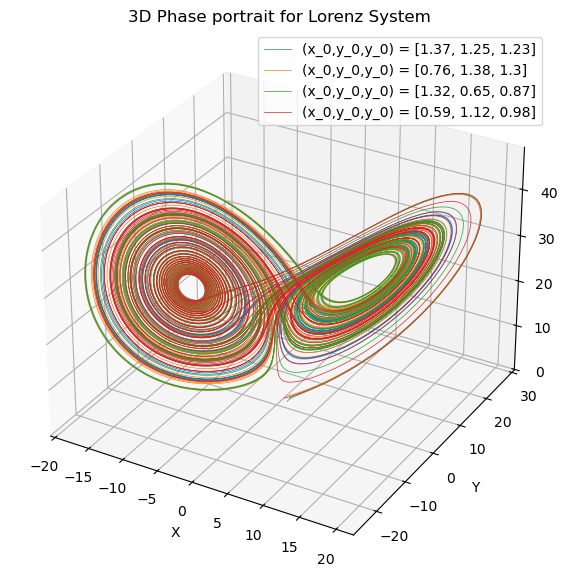

In [11]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

initial_conditions = [
    [random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5)],
    [random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5)],
    [random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5)],
    [random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5)]
]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Phase portrait for Lorenz System")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

t_span = (0, 50)
t_eval = np.linspace(0, 50, 10000)

for state in initial_conditions:
    solution = solve_ivp(lorenz, t_span, state, t_eval=t_eval, args=(sigma, beta, rho))
    x, y, z = solution.y
    rounded_IC = [round(val, 2) for val in state]
    ax.plot(x, y, z, lw=0.5, label=f"(x_0,y_0,y_0) = {rounded_IC}")

ax.legend()
plt.show()


In [9]:
#For .gif generation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("The Lorenz system")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

line, = ax.plot([], [], [], lw=0.5)

ax.set_xlim((x.min(), x.max()))
ax.set_ylim((y.min(), y.max()))
ax.set_zlim((z.min(), z.max()))

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def update(frame):
    line.set_data(x[:frame], y[:frame])
    line.set_3d_properties(z[:frame])
    return line,

frames = np.linspace(0, len(t_eval) - 1, 1000, dtype=int)
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

ani.save("./diagrams/lorenz.gif", writer=PillowWriter(fps=24))
plt.close(fig)

### Dynamical systems in general

In this course we have focused exclusively on dynamical systems governed by systems of ODEs. These are examples of **continuous dynamical systems** as the underlying parameter is continuous. A related class of systems are **discrete dynamical systems** where the underlying parameter is discrete. A very popular discrete dynamical system is given by the map 
$$
\mathbb{C} \ni x_{n+1} = x_n^2 + c, \;x_0 = 0 , \; c \in \mathbb{C}, \; n \in \mathbb{N}.
$$
The dynamics associated to this map is very rich and has been studied extensively. The set of points $c \in \mathbb{C}$ for which the sequence $(x_n)_{n \in \mathbb{N}}$ remains bounded in modulus is called the [**Mandelbrot set**](https://en.wikipedia.org/wiki/Mandelbrot_set). 

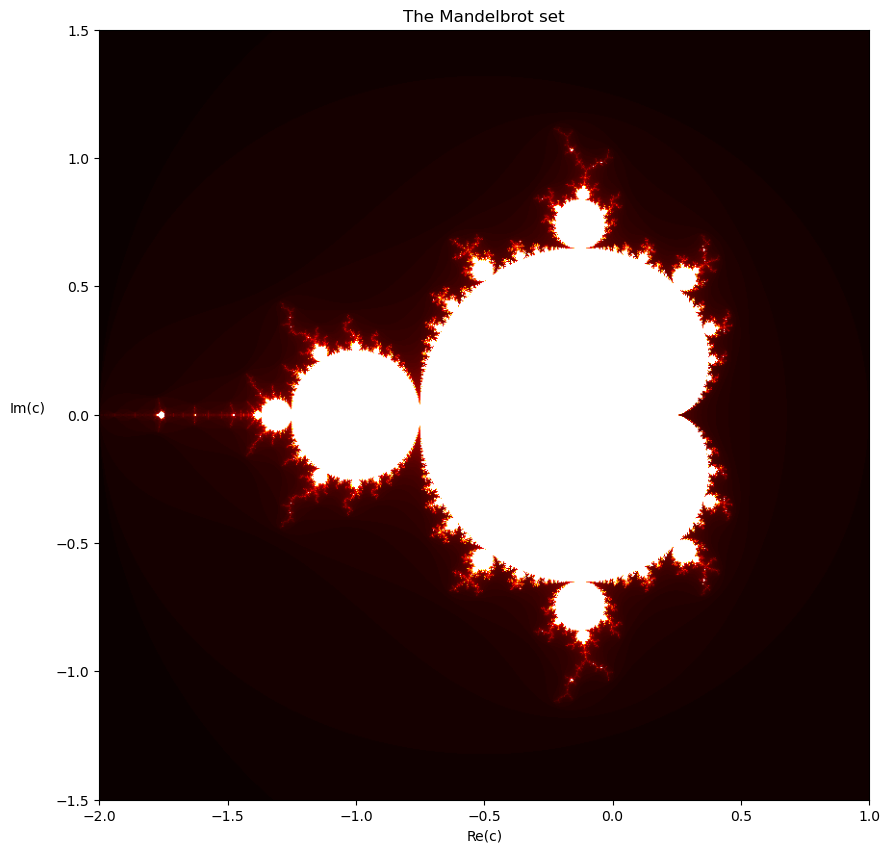

In [10]:
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
width, height = 800, 800
max_iter = 125

x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y

Z = np.zeros_like(C, dtype=complex)
mandelbrot_set = np.zeros(C.shape, dtype=int)

for i in range(max_iter):
    mask = np.abs(Z) <= 2
    Z[mask] = Z[mask] ** 2 + C[mask]
    mandelbrot_set[mask] = i

plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap="hot", origin="lower")
plt.title("The Mandelbrot set")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)", rotation=0, labelpad=20)
plt.show()

Another important class of discrete dynamical systems are given by [**finite-state Markov chains**](https://en.wikipedia.org/wiki/Markov_chain). These are systems where the state space is finite and the dynamics are given by a transition matrix $P$ that describes the probability of moving from one state to another. The eigenvalues of the transition matrix $P$ turns out to be of great importance in understanding the long-term behavior of the Markov chain since the dynamics are essentially driven by powers of $P$. 


> **Example (Grambler's ruin problem):** Suppose there are two players $A$ and $B$ playing a game, where player $A$ has $\$ 1$ and player $B$ has $\$ 2$. The game is played as follows: at each time step, player $A$ wins with probability $p = \frac{2}{3}$ and player $B$ wins with probability $1-p = \frac{1}{3}$. If player $A$ wins, they gain \$1 from player $B$, and if player $B$ wins, they gain \$1 from player $A$. The game continues until one of the players goes bankrupt (i.e., has \$0). What is the probability that player $A$ wins the game?
>
> To solve this problem, one can model the game as a finite-state Markov chain. The implicit constraint in this problem is that the sum of the two players' money is constant, i.e., $X_A + X_B = 3$. This means that the state space of the Markov chain can be represented as $S = \{0, 1, 2, 3\}$, where $0$ represents player $A$ going bankrupt, $1$ represents player $A$ having \$1, $2$ represents player $A$ having \$2, and $3$ represents player $B$ going bankrupt. A graphical representation of a Markov chain is known as the *transition diagram*. For this problem, it is given as follows.
> 
> <div style="text-align: center;">
>     <img src="./diagrams/markov.png" alt="Gambler's ruin" style="width: 33%;">
> </div>
>
> From the theory of Markov chains, the probabilities that one player wins the game can be computed by writing down a linear system of equations describing the **absorption probabilities**. This is beyond the scope of the course, the interested reader can find more details in any book on basic probability theory. In the end, one finds that the probability that player $A$ wins the game starting with $\$ 1$ is $\frac{7}{13}$. 

In general, one often wants to understand the long term dynamics assocaited to Markov chains. An important result in this direction is the [**Perron-Frobenius theorem**](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem), which guarantees that for certain Markov chains the largest eigenvalue of $P$ is always equal to $1$, and the corresponding eigenvector gives the stationary distribution of the Markov chain, which one can think of as the long term steady-state distribution of the states. 

This again illustrates why eigenvalues and eigenvectors are so important, because they often give us information about the long-term behavior of dynamical systems.

The study of Markov chains in general is a very active area of research in probability theory and has many applications in various fields, including mathematical finance, machine learning, and operations research.